In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import random

In [2]:
pd.set_option("display.max_rows", 1500,"display.max_columns", 168)

def import_csv(model):
    data_list = []
    for file in glob.glob('..\\'+ model +'\**\*.csv', recursive=True):
        data = pd.read_csv(file, sep = ';')
        data_list.append(data)
    return pd.concat(data_list)

In [3]:
data_SMT_base = import_csv('SMT_base').reset_index(drop = True)
data_SMT_multiple_instances = import_csv('SMT_multiple_instances').reset_index(drop = True)
data_SMT_symmetry = import_csv('SMT_symmetry').reset_index(drop = True)
data_SMT_rotation = import_csv('SMT_rotation').reset_index(drop = True)
data_SMT_final = import_csv('SMT_final').reset_index(drop = True)

print(data_SMT_base.shape)
print(data_SMT_base.head(50))
print(data_SMT_base.columns) 


(33, 3)
   instance_name  sol_found  solveTime
0            8x8       True      0.028
1            9x9       True      0.010
2          10x10       True      0.011
3          11x11       True      0.014
4          12x12       True      0.020
5          13x13       True      0.038
6          14x14       True      0.040
7          15x15       True      0.062
8          16x16       True      0.062
9          17x17       True      0.112
10         19x19       True      0.266
11         20x20       True      0.169
12         21x21       True      0.253
13         18x18       True      0.186
14         22x22       True      0.191
15         24x24       True      0.339
16         23x23       True      0.788
17         25x25       True      0.227
18         38x38       True      1.199
19         31x31       True      1.350
20         30x30       True      1.008
21         40x40       True      2.072
22         27x27       True      0.927
23         28x28       True      3.397
24         34x34 

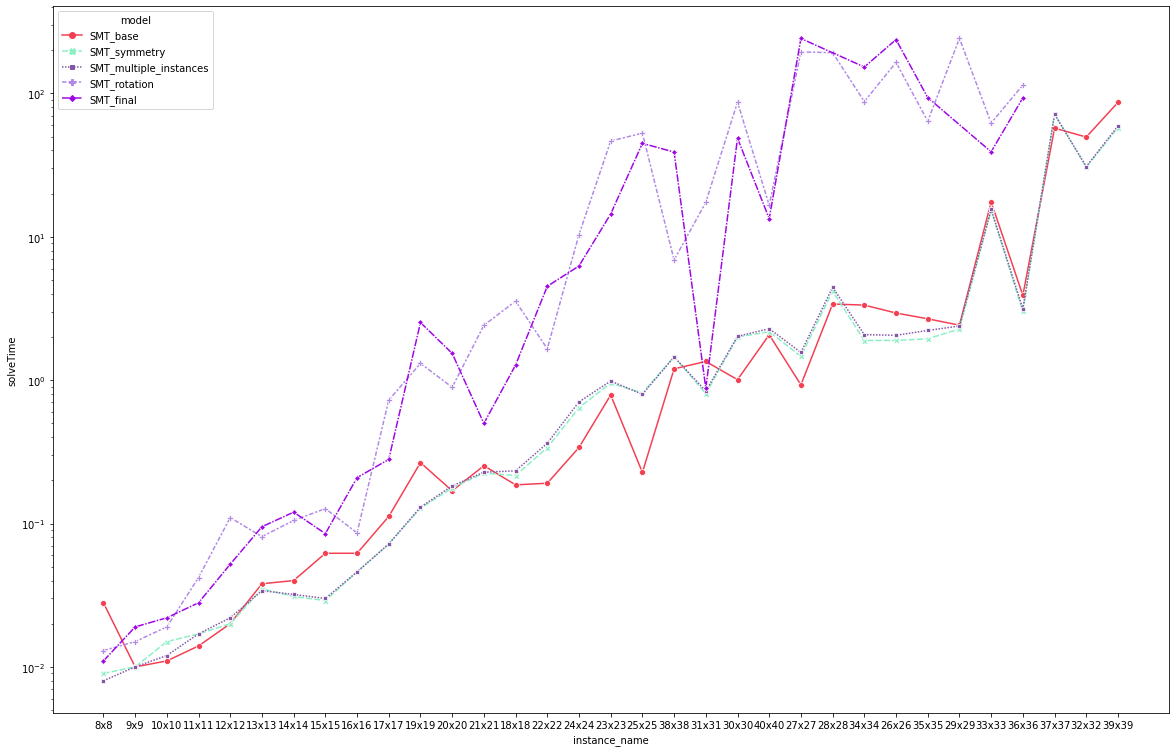

<Figure size 432x288 with 0 Axes>

In [7]:

sol_data_SMT_base = data_SMT_base[data_SMT_base.sol_found == True]
sol_data_SMT_base['model'] = 'SMT_base'

sol_data_SMT_symmetry = data_SMT_symmetry[data_SMT_symmetry.sol_found == True]
sol_data_SMT_symmetry['model'] = 'SMT_symmetry'

sol_data_SMT_multiple_instances = data_SMT_multiple_instances[data_SMT_multiple_instances.sol_found == True]
sol_data_SMT_multiple_instances['model'] = 'SMT_multiple_instances'

sol_data_SMT_rotation_o = data_SMT_rotation[data_SMT_rotation.sol_found == True]
sol_data_SMT_rotation = sol_data_SMT_rotation_o.copy()
sol_data_SMT_rotation['model'] = 'SMT_rotation'


sol_data_SMT_final_o = data_SMT_final[data_SMT_final.sol_found == True]
sol_data_SMT_final = sol_data_SMT_final_o.copy()
sol_data_SMT_final['model'] = 'SMT_final'




plt.figure(figsize=(20,13))
df = pd.concat([sol_data_SMT_base, sol_data_SMT_symmetry,sol_data_SMT_multiple_instances, 
sol_data_SMT_rotation, sol_data_SMT_final]).reset_index(drop=True)
g = sns.lineplot(x='instance_name', y='solveTime', hue='model',style="model", markers= True, data = df[['instance_name', 'solveTime', 'model']], palette=["#"+''.join([random.choice('0123456789ABCDEF') for _ in range(6)])  for _ in df.model.unique()] )
g.set(yscale='log')
plt.show()
plt.draw()

